This is one of the main analysis notebooks for my report.

In [1]:
import pandas as pd
import torch
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp

import bionics.biofuzznet.biofuzznet as biofuzznet
import bionics.biofuzznet.biomixnet as biomixnet
import bionics.biofuzznet.utils as utils
import networkx as nx

/home/ubuntu/storage/miniconda3/envs/bionics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# The DREAM CNoRFuzzy dataset

In [2]:
RMSE_df_dream = pd.read_csv("DREAM/CNoRFuzzy_data_reduced/CV_DREAM_reduced/RMSE_df.csv", index_col = 0)
params_df_dream = pd.read_csv("DREAM/CNoRFuzzy_data_reduced/CV_DREAM_reduced/params_df.csv", index_col = 0)
test_set_df_dream = pd.read_csv("DREAM/CNoRFuzzy_data_reduced/CV_DREAM_reduced/test_set_df.csv", index_col = 0)
DREAM_model = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file("DREAM/CNoRFuzzy_data_reduced/optimised_structure_DREAM_reduced.sif")

In [3]:
# Is any test set used several times?
len(test_set_df_dream.drop_duplicates())
# There is 18 duplicate test sets. I'll keep the corresponding rows for the analysis

#test_set_df_dream_unique = test_set_df_dream.drop_duplicates()
#test_set_df_dream_unique

79

In [4]:

RMSE_df_dream

,tnfa,il1a,igf1,tgfa,map3k7,mek12,map3k1,mkk4,ikk,akt,p38,pi3k,ras,erk12,hsp27,jnk12,ikb
0,0.0,0.0,0.0,0.0,0.050955,0.039350,0.010776,0.031825,0.002564,0.034522,0.007618,0.108054,0.032609,0.002065,0.011689,0.007419,0.015858
1,0.0,0.0,0.0,0.0,0.117557,0.001215,0.006336,0.003765,0.002560,0.035938,0.069580,0.101826,0.001286,0.000389,0.054317,0.028454,0.007588
2,0.0,0.0,0.0,0.0,0.052188,0.000187,0.014443,0.003295,0.004602,0.021300,0.011773,0.069551,0.000168,0.000176,0.017043,0.021300,0.010329
3,0.0,0.0,0.0,0.0,0.038888,0.000190,0.008855,0.018116,0.006491,0.030601,0.015419,0.093295,0.000066,0.000022,0.020908,0.030593,0.004410
4,0.0,0.0,0.0,0.0,0.044660,0.000009,0.012854,0.008450,0.010535,0.068186,0.012464,0.126698,0.000010,0.000136,0.012929,0.012818,0.007883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,0.0,0.0,0.054156,0.000978,0.002235,0.006474,0.012275,0.034368,0.014212,0.079192,0.001896,0.000256,0.019702,0.011293,0.013736
93,0.0,0.0,0.0,0.0,0.107211,0.000839,0.005321,0.009377,0.010381,0.036319,0.094247,0.105768,0.000349,0.000186,0.009290,0.012365,0.008250
94,0.0,0.0,0.0,0.0,0.050214,0.000038,0.006036,0.009781,0.014237,0.048624,0.007753,0.123465,0.000025,0.000036,0.030614,0.027867,0.009388
95,0.0,0.0,0.0,0.0,0.060534,0.000001,0.011616,0.005967,0.013245,0.031442,0.033239,0.110317,0.000124,0.000077,0.006670,0.012190,0.007729


In [5]:
plt.rcParams['font.size'] = '16'

In [6]:
test_set_df_dream

,test_1,test_2,test_3,test_4,test_5
0,9,12,13,14,15
1,6,8,10,12,15
2,6,9,12,13,14
3,6,8,11,13,14
4,10,11,13,14,15
...,...,...,...,...,...
92,6,7,9,11,13
93,6,7,10,14,15
94,6,7,8,9,11
95,7,8,11,12,14


In [7]:
# Order nodes by distance to input nodes

input_nodes_dream = ["tnfa", "il1a", "tgfa", "igf1"]
nodes_of_interest_dream = [c for c in RMSE_df_dream if c not in input_nodes_dream]

distance = {}
for node in nodes_of_interest_dream:
    d = []
    for input_node in input_nodes_dream:
        try:
            path = nx.bidirectional_shortest_path(DREAM_model, input_node, node)
            #path = [n for n in path if n in DREAM_model.biological_nodes]
            d.append(len(path))
        except Exception as e:
            print("no path")
    d = max(d)
    distance[node] = d

# Sort by path length
distance = dict(sorted(distance.items(), key=lambda item: item[1]))
nodes_of_interest_dream = list(distance.keys())


no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path


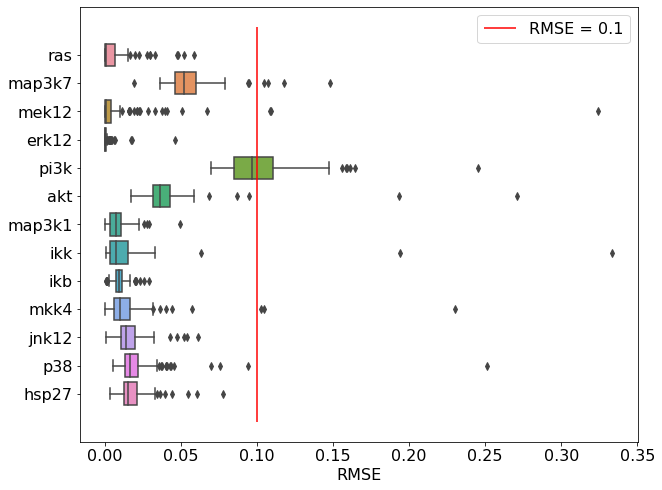

In [8]:
# Do a box plot for each node except the input nodes
plt.figure(figsize = (10,8))
sns.boxplot(data = RMSE_df_dream[nodes_of_interest_dream], orient = "h")
plt.vlines( x = 0.1,ymin =-1, ymax = 13, label = "RMSE = 0.1", color = "r")
plt.xlabel("RMSE")
plt.legend()

We notice several things:
* The performance for certain nodes is highly dependent on the test set chosen
* 5 out of 11 non-input nodes have a median RMSE that is superior to 0.1 and are thus wrongly predicted in many cases
* Of the 4 nodes that are downstream very badly predicted: mkk4, p38, hsp27, jnk12. p38, hsp27 and jnk12 are all downstream of mkk4, therefore it is likely the error on their prediction comes from an error on the prediction of mkk4
* ikb is a leaf node but is predicted with great accuracy
* Data is normalised between 0 and 1

**I would argue that this dataset is not optimal for BioFuzzNet because very few datapoints. Hence the results are not super great, but we hope it'd work better if there were single cells**


In [9]:
params_df_dream = params_df_dream.reset_index(drop = True)
params_df_dream

,mek12,erk12,mkk4,mkk4.1,mkk4.2,ikk,ras,ras.1,ras.2,map3k7,...,and4,p38,p38.1,and5,and6,and7,and8,and9,and10,and11
0,erk12,or19,or1,or14,or22,ikb,mek12,or15,or16,or2,...,p38,or19,or21,or6,or7,or8,or9,or20,or20,or1
1,0.9091648791537865,0.5149330485001167,0.39079902683021533,0.485072015899711,-0.011222999941615264,0.013167800958190336,0.6580933055387146,0.8560432564991511,0.3573013613759302,-0.3529228193915281,...,-1.0996528920476398,-1.4531436115179335,0.8174262100355834,0.6553486309438095,-0.3018027940466949,0.036870783555472304,-0.0721420344400211,0.6019544852139245,0.1382403257440062,-1.6857800599972026
2,-1.3630610976236053,-1.2685543385730282,-0.22060555635237794,0.09660071770228834,-1.2444038896494811,0.6970819069938763,0.13817193944148795,-0.6797789997915755,-1.2083973614665515,0.45570963672205217,...,-0.1712657413776327,-0.7957168223264883,0.21055888868517808,0.537133531185028,0.3735243352626752,0.06919995259624867,-1.0952047069145951,-0.3424954137866289,-0.71916830336104,0.4434661323722744
3,"[-0.09066224945636961, -2.559176775814656]","[0.3097185511244704, 1.171067576077475]","[1.1004347867808113, -1.5908028646184607]","[0.707722285593494, -0.5204253681067678]","[0.7480459024621954, -0.9292602199962555]","[1.1696108275505, -1.2846351797176647]","[0.9751990491501374, -1.5680699971741416]","[1.192153948932781, 1.268040498474529]","[0.06271112333109334, 1.7044362965466195]","[0.365064876645912, -2.9726357642647088]",...,"[1.4618941516759836, -1.3104548832636056]","[0.8031017352624851, -1.2293506726622652]","[0.6261580580451657, -0.42684591347851975]","[0.6534307336409283, -0.34749468995577476]","[0.7157460509592102, -0.01983403623493263]","[0.3082904712950626, 0.12829073025299984]","[-0.5936952058326957, -0.3976442823360112]","[1.6416607865224648, -0.7963361982669875]","[-0.13924396531443323, 0.02117462115545981]","[0.6312240334604948, 0.5147971282758919]"
4,"[0.3676453520173656, -1.581308620747923]","[1.2206146085539111, 0.2623288433526589]","[0.5714217492008201, -1.9559635506378086]","[-0.116304776777132, 1.438701302182104]","[1.7495224520776413, -0.6606956977578275]","[2.032726563513622, -0.6537485944017806]","[1.3335137762420788, -1.5971662511793197]","[0.18895241610554211, 1.4463891407576273]","[-1.3520180528260017, -0.6769340375635536]","[1.2809874403466608, -1.4473474770701091]",...,"[1.2804860124925583, -0.9991475361355782]","[-0.8060346476740836, 0.31469624986774314]","[1.6812468909343183, -0.07874540698327477]","[1.1634796563845702, -0.3272509578008096]","[0.2842180912508328, 0.8615619017781366]","[1.035690065323971, 0.6883480435164336]","[1.9585001679395402, 0.35789977856541433]","[1.418256701900749, -0.34128034081212605]","[1.4663512922592081, -0.9578999485926297]","[1.097422966682603, 0.24413380196101744]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[0.1868713718415282, -1.8840282757627997]","[-0.3202963732485295, 0.09065565920123327]","[0.7795912715742657, -2.0017249579794254]","[1.5418307690579591, -1.3458854355964984]","[-0.4888984658465129, 0.14347643494957263]","[1.2233706785690943, -1.233283271538296]","[1.3515913135664066, -1.5819479835378891]","[1.495236778269575, 0.5324834187386837]","[1.20171941709426, 0.6218298311596394]","[0.7670794244513942, -2.291007065767631]",...,"[1.6847655194409812, -0.73765027085826]","[0.972461260848354, -0.8945586511470851]","[0.2347612567491636, 0.300583860087186]","[1.2928847804666648, 1.2550685750074477]","[1.362355046806481, 0.43897205438012754]","[0.4761474040744221, 1.8286171540852112]","[0.43266146934530225, 0.6765721247286278]","[0.7131972492551529, 0.9783668683513588]","[1.5340638432771327, -1.6518079270345496]","[0.7889964139656983, 1.4730827824294088]"
96,"[0.527085066570476, -1.3576892832234235]","[0.041039621386316276, -0.2969331142706938]","[1.516478407680908, -0.8349298807066866]","[1.7129042085198802, -1.5370421422960716]","[0.695887630290608, -0.022201437341160268]","[1.861041943363325, -0.7513569907164798]

In [10]:
# It'd also be interesting to see the distribution of n/K parameters: do we always converge to a similar network?

# Set up the transfer edges name
n_params = {}
K_params = {}
for node1 in params_df_dream.columns:
    node2 = params_df_dream.loc[0, node1]
    n_params[(node1, node2)] = [exp(float(params_df_dream.loc[1, node1]))]
    K_params[(node1, node2)] = [exp(float(params_df_dream.loc[2, node1]))]
    for i in range(3, 100):
        str_val = params_df_dream.loc[i, node1].split(",")
        n = float(str_val[0][1:])
        K = float(str_val[1][:-1])
        n_params[(node1, node2)].append(exp(n))
        K_params[(node1, node2)].append(exp(K))

n_df_dream = pd.DataFrame(n_params)
K_df_dream = pd.DataFrame(K_params)

<AxesSubplot:>

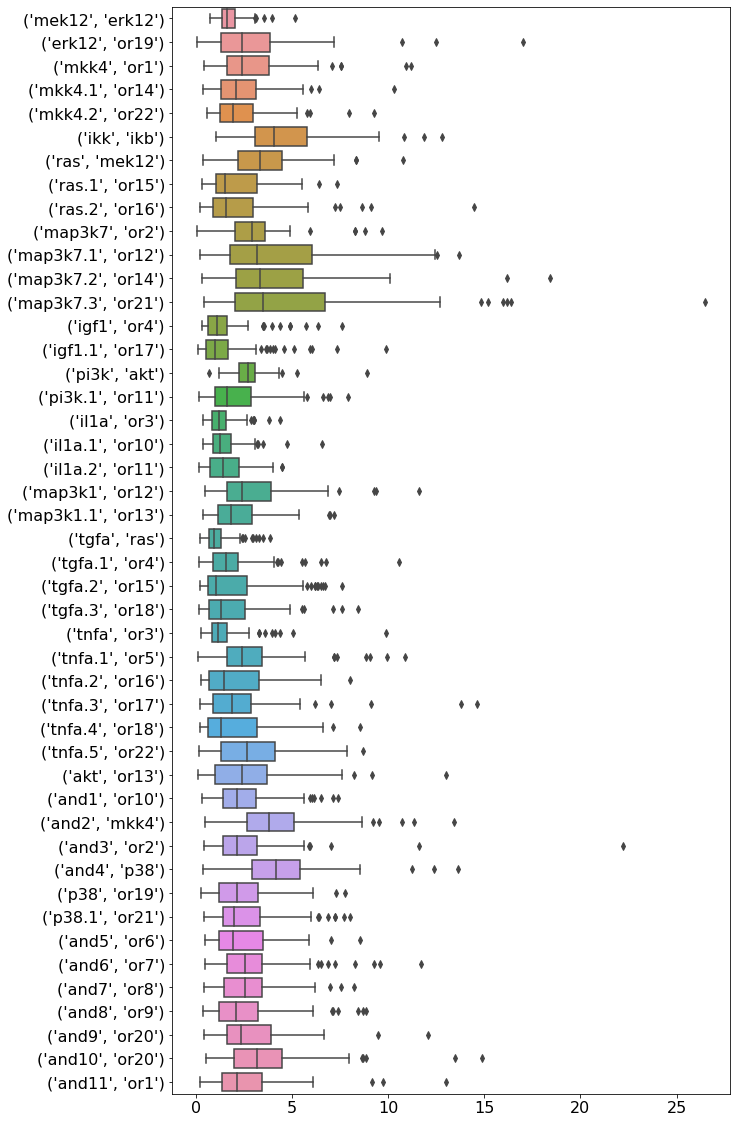

In [11]:
plt.figure(figsize = (10,20))
sns.boxplot(data = n_df_dream, orient = "h")

<AxesSubplot:>

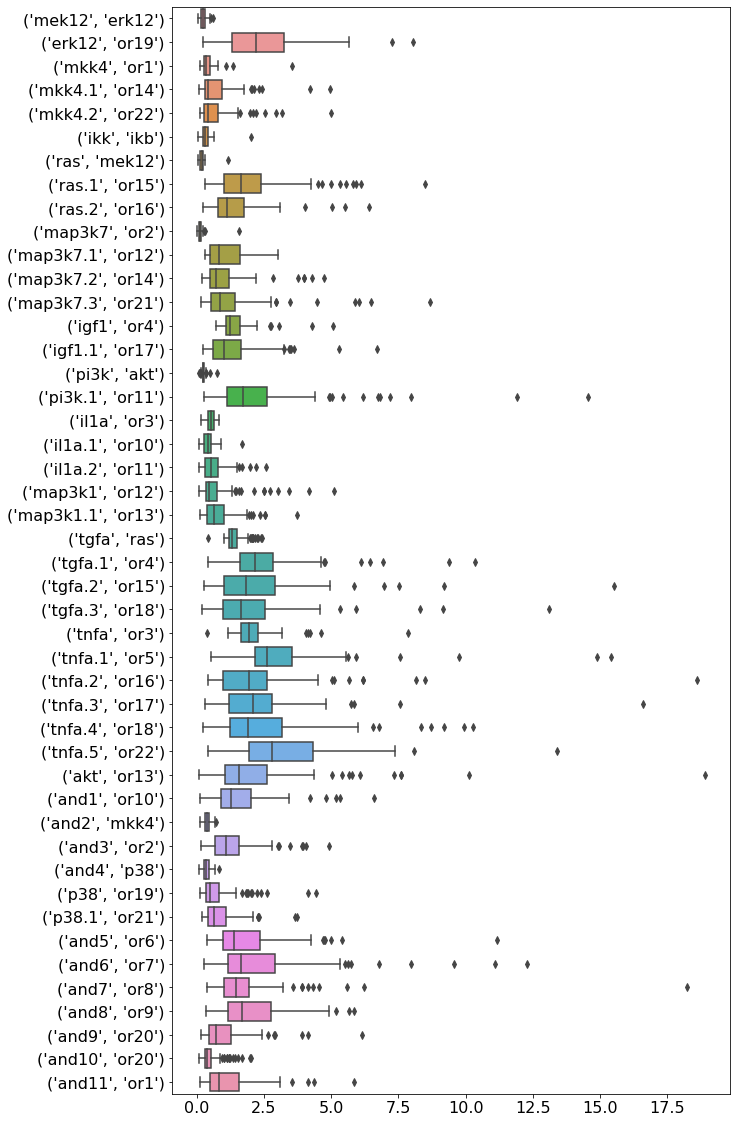

In [12]:
plt.figure(figsize = (10,20))
sns.boxplot(data = K_df_dream, orient = "h")

We observe a great variability of parameters: the optimised network is very different in all cases

# Boolean inputs manual network & BioFuzzNet

In [25]:
RMSE_df_bool = pd.read_csv("Hill_new_domains/CV_Hill_Boolean/RMSE_df.csv", index_col = 0)
params_df_bool = pd.read_csv("Hill_new_domains/CV_Hill_Boolean/params_df.csv", index_col = 0)
test_set_df_bool = pd.read_csv("Hill_new_domains/CV_Hill_Boolean/test_set_df.csv", index_col = 0)
manual_network = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file("../../bionics/biofuzznet/example_networks/Network_without_GRN.tsv")

In [26]:
test_set_df_bool

,test_1,test_2,test_3,test_4,test_5
0,8,11,12,13,14
1,5,7,9,11,14
2,5,8,11,12,13
3,5,7,10,12,13
4,9,10,12,13,14
...,...,...,...,...,...
95,5,6,8,10,12
96,5,6,9,13,14
97,5,6,7,8,10
98,6,7,10,11,13


In [27]:
# Is any test set used several times?
len(test_set_df_bool.drop_duplicates())
# There is 18 duplicate test sets. I'll keep the corresponding rows for the analysis

#test_set_df_dream_unique = test_set_df_dream.drop_duplicates()
#test_set_df_dream_unique

82

In [28]:

RMSE_df_bool

,CD28,PI3K,Lck,Grb2,GADS,Akt,AP1,ERK12,GSK3b,CD3z,...,CTLA4,PP2A,SHP2,SHP1,IL15Ra,Shc,JAK1,STAT3,cmyc,CD45
0,0.0,0.015878,0.002105,0.004219,6.865377e-12,0.019792,0.000369,0.002356,0.014291,0.005341,...,0.0,0.000016,1.831839e-05,1.242957e-05,0.0,3.065974e-05,0.000663,0.000086,1.708094e-03,0.0
1,0.0,0.026827,0.008083,0.008564,1.181339e-07,0.021784,0.002117,0.007464,0.020877,0.004749,...,0.0,0.000058,1.022910e-03,3.642447e-06,0.0,1.917746e-04,0.001187,0.000010,2.076983e-05,0.0
2,0.0,0.010745,0.000070,0.002450,1.890260e-08,0.019720,0.000604,0.000121,0.002091,0.002898,...,0.0,0.000031,4.793599e-06,2.273274e-02,0.0,1.175943e-04,0.000697,0.000156,4.749007e-03,0.0
3,0.0,0.004268,0.000237,0.024458,9.667583e-03,0.016185,0.000124,0.000046,0.001406,0.001511,...,0.0,0.000002,7.302834e-05,3.108354e-06,0.0,4.430090e-05,0.022514,0.120688,7.024022e-03,0.0
4,0.0,0.012909,0.008275,0.037699,8.167631e-10,0.007619,0.001128,0.001175,0.024691,0.004712,...,0.0,0.000027,1.674461e-02,3.523258e-06,0.0,1.162562e-11,0.001420,0.000012,1.233963e-10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.017694,0.000041,0.002714,2.400994e-04,0.008460,0.000148,0.000355,0.002316,0.000816,...,0.0,0.000141,9.526619e-04,7.676333e-08,0.0,7.053475e-05,0.000969,0.000008,6.900050e-07,0.0
96,0.0,0.033063,0.002059,0.012819,4.568788e-03,0.031136,0.000171,0.000186,0.013558,0.002073,...,0.0,0.000002,2.682228e-05,1.610595e-06,0.0,1.252664e-04,0.001261,0.000371,1.517739e-02,0.0
97,0.0,0.037300,0.000004,0.001982,3.845824e-09,0.019574,0.000191,0.000285,0.001781,0.000752,...,0.0,0.000004,1.505928e-05,2.956324e-07,0.0,6.027172e-05,0.000944,0.000088,5.608052e-03,0.0
98,0.0,0.005250,0.001439,0.002165,1.986260e-04,0.017144,0.000891,0.003332,0.008975,0.003086,...,0.0,0.000006,6.088498e-02,6.424927e-06,0.0,1.303968e-04,0.001182,0.000117,4.294558e-03,0.0


In [29]:
plt.rcParams['font.size'] = '16'

In [30]:
# Order nodes by distance to input nodes

input_nodes_bool = ["CD28", "CTLA4", "IL15Ra", "CD45", "41BB", "CD40"]
nodes_of_interest_bool = [c for c in RMSE_df_bool if c not in input_nodes_bool]

distance = {}
for node in nodes_of_interest_bool:
    d = []
    for input_node in input_nodes_bool:
        try:
            path = nx.bidirectional_shortest_path(manual_network, input_node, node)
            #path = [n for n in path if n in manual_network.biological_nodes]
            d.append(len(path))
        except Exception as e:
            #print(node, input_node)
            print("no path")
    d = max(d)
    distance[node] = d

# Sort by path length
distance = dict(sorted(distance.items(), key=lambda item: item[1]))
nodes_of_interest_bool = list(distance.keys())


no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path


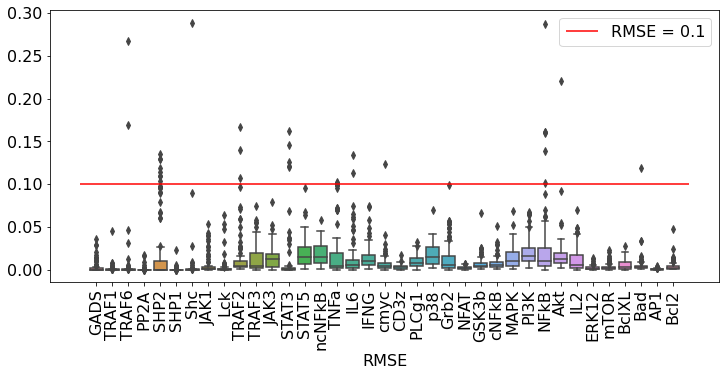

In [31]:
# Do a box plot for each node except the input nodes


plt.figure(figsize = (12,5))
ax = sns.boxplot(data = RMSE_df_bool[nodes_of_interest_bool], orient = "v")
plt.hlines( y = 0.1,xmin =-1, xmax = 37, label = "RMSE = 0.1", color = "r")
plt.xlabel("RMSE")
plt.xticks(rotation = 90)
plt.legend()


**Excellent performance as expected**


In [32]:
params_df_bool =  params_df_bool.reset_index(drop = True)
params_df_bool

,CD28,CD28.1,CD28.2,CD28.3,PI3K,PI3K.1,PI3K.2,Lck,Lck.1,Grb2,...,SHP2,SHP2.1,SHP1,IL15Ra,IL15Ra.1,IL15Ra.2,Shc,JAK1,STAT3,CD45
0,GADS,or1,or5,or6,not1,or8,or9,not2,or18,or1,...,not15,not16,not17,Shc,JAK1,or39,or7,STAT3,STAT3_and_STAT5,or5
1,0.4298300537749811,-1.2996457399850714,1.3157675139904201,-0.2041515730086226,-0.9948605075239526,0.9593161784266082,-0.8919315303139721,-0.0771036969030355,0.1392694038002189,0.8182531562510627,...,0.8494543558875538,-0.6813296697311465,0.14869603501971237,0.21806479660990188,-1.1376172643636697,0.6776304812559875,-0.9411551951339787,0.5577132332593382,1.8056216929382405,0.32494285803313816
2,-0.09428943871993514,0.2981485756402372,-0.28555470395222493,-0.544469743224835,-1.4309728834104207,-1.2442844421291577,-0.5002468463607065,-1.2123223385375568,-0.8263860160137009,-0.7537562732094691,...,0.9390777205919631,-0.2662029296920856,-0.23889093804319095,-1.3137514469606781,-0.5128881316155999,-0.27362088996917255,-1.1892696200562178,-0.012462010654134742,1.1436809489266586,-0.413600684227982
3,"[0.6429816118411931, -0.07618904066042569]","[-0.09999007848632639, -0.4601316761903997]","[0.09756842526374368, -0.9276745243909363]","[0.2512330011463045, -0.3543266874903333]","[0.6102003550256077, -0.7585678804383509]","[0.5640670950322292, -1.667000247063189]","[0.8228692611137778, -0.7644759276103147]","[0.38596098743229357, -0.6210221971535286]","[0.47925185395042624, -0.40808506142061657]","[-0.3953498065796646, -1.5978243687409104]",...,"[1.3289343751869276, -0.46086834304806196]","[0.5587136534143029, -0.8787009591153314]","[-0.32214656606553427, -1.3325746920674821]","[1.1137357978220221, -0.5366135159801602]","[-1.042866121923289, -0.465672219348547]","[-1.2846892055369354, -1.9781335507946023]","[0.6522053207826216, -0.4047864395748087]","[0.2337306081593311, 0.21812797421526525]","[0.5156664832052579, 0.41639541872690805]","[-0.25991192013722947, -0.7529192413929382]"
4,"[-0.25961888336235456, -0.18788275485975586]","[-0.632263648033691, -0.3708334235531336]","[-0.7649774180405629, -1.9382874597360262]","[0.07832403378658143, -0.36285557261236373]","[0.1637037457620868, -0.9735648288616997]","[1.5165344238201608, -0.6926686760601458]","[-0.5405382544558692, -0.2023820795292568]","[0.412202506731896, -0.21663420315561]","[1.1802106377768735, 0.20052132673747738]","[0.3056381907517973, -1.2935851047716]",...,"[0.5689752715188462, -0.061949732231783114]","[-0.7570903038174654, -1.149918935985303]","[-0.10359265083684556, 1.2333205562042984]","[1.284428104729577, -0.4528844778939468]","[0.6768026069494487, -0.08356610478298004]","[-0.20204714714978952, -0.2993539726541121]","[-1.0085321523918762, -0.98662134146381]","[0.12670120312875105, 0.31182243270288074]","[1.371690217339691, -0.16018643438827862]","[-0.2679202412889903, -0.791921053709219]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,"[-0.5989212247208887, -0.2665574643130727]","[-0.05909956125985405, -0.07632221962590552]","[0.4428786111491996, -0.6841809147642215]","[0.2805168463449045, -0.34796425640112094]","[0.13662920342675527, -0.8434139043788195]","[1.0808971312108655, -0.9880505604538918]","[-0.4882164602080715, 0.06727872158587737]","[-0.4381673803132685, -0.5891181434390673]","[1.3066291799246332, -1.3002331380137295]","[0.2557100840467951, -1.1037996412515836]",...,"[0.343574049759479, -0.6157288497996282]","[-0.7691445047462714, -1.3938334883723758]","[-0.11584492064050668, -0.3464311048212207]","[0.06670080196215468, -1.5278214763170765]","[1.2796305179357523, -0.045732505193045184]","[0.7635921965949599, -0.24903952830743015]","[0.5746497254890075, -0.4188463203775673]","[0.8420249569785934, -0.16140022561489]","[1.6540145463591807, 1.16525723775856]","[-0.1677738168125531, -0.6769165289906041]"
99,"[-1.3181152421393851, -0.6101345476390109]","[-0.8070666037875417, -2.2036798101372477]","[0.30780627613541967, -0.7528545977944457]","[-0.7321596055396397, -0.7194386701509217]"

In [33]:
# It'd also be interesting to see the distribution of n/K parameters: do we always converge to a similar network?

# Set up the transfer edges name
n_params = {}
K_params = {}
for node1 in params_df_bool.columns:
    node2 = params_df_bool.loc[0, node1]
    n_params[(node1, node2)] = [exp(float(params_df_bool.loc[1, node1]))]
    K_params[(node1, node2)] = [exp(float(params_df_bool.loc[2, node1]))]
    for i in range(3, 103):
        str_val = params_df_bool.loc[i, node1].split(",")
        n = float(str_val[0][1:])
        K = float(str_val[1][:-1])
        n_params[(node1, node2)].append(exp(n))
        K_params[(node1, node2)].append(exp(K))

# The first value of each list is the one that was used to generate the data
for k in n_params.keys():
    n_params[k] = [n_params[k][i] - n_params[k][0] for i in range(len(n_params))]
    K_params[k] = [K_params[k][i] - K_params[k][0] for i in range(len(K_params))]
n_df_bool = pd.DataFrame(n_params)
K_df_bool = pd.DataFrame(K_params)

<AxesSubplot:>

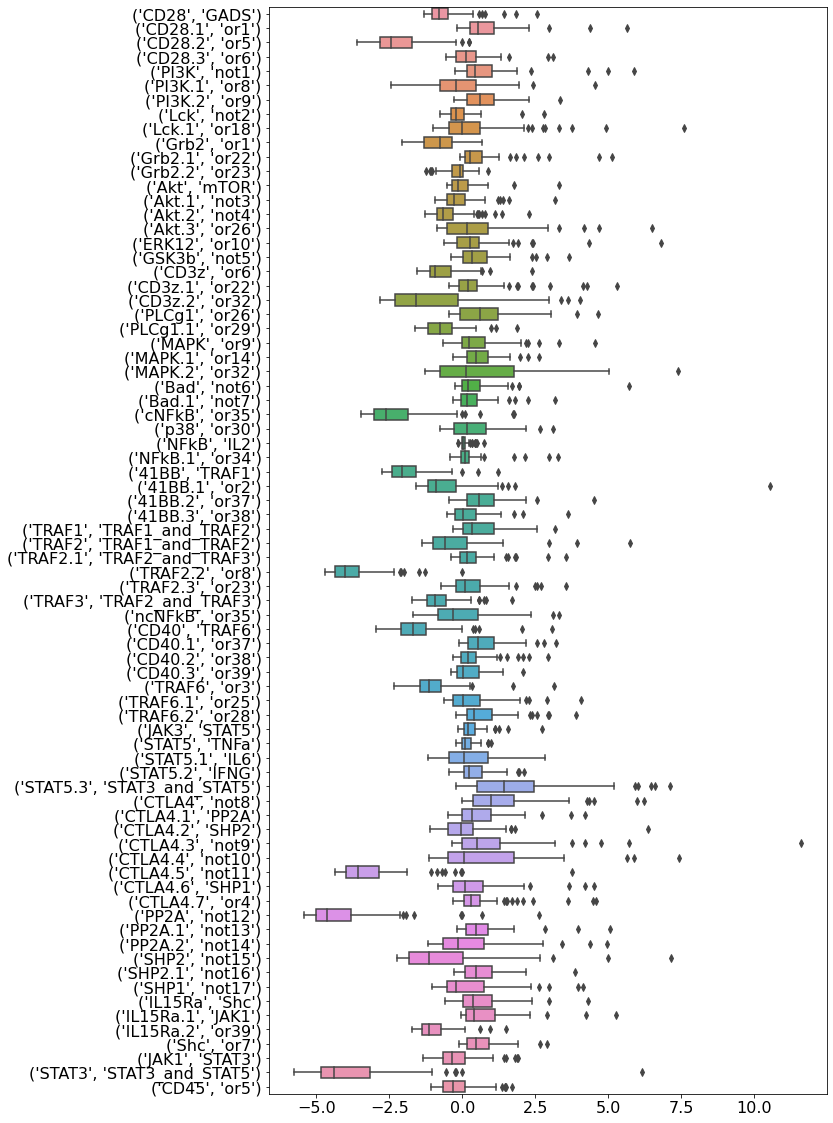

In [34]:
plt.figure(figsize = (10,20))
sns.boxplot(data = n_df_bool, orient = "h")

<AxesSubplot:>

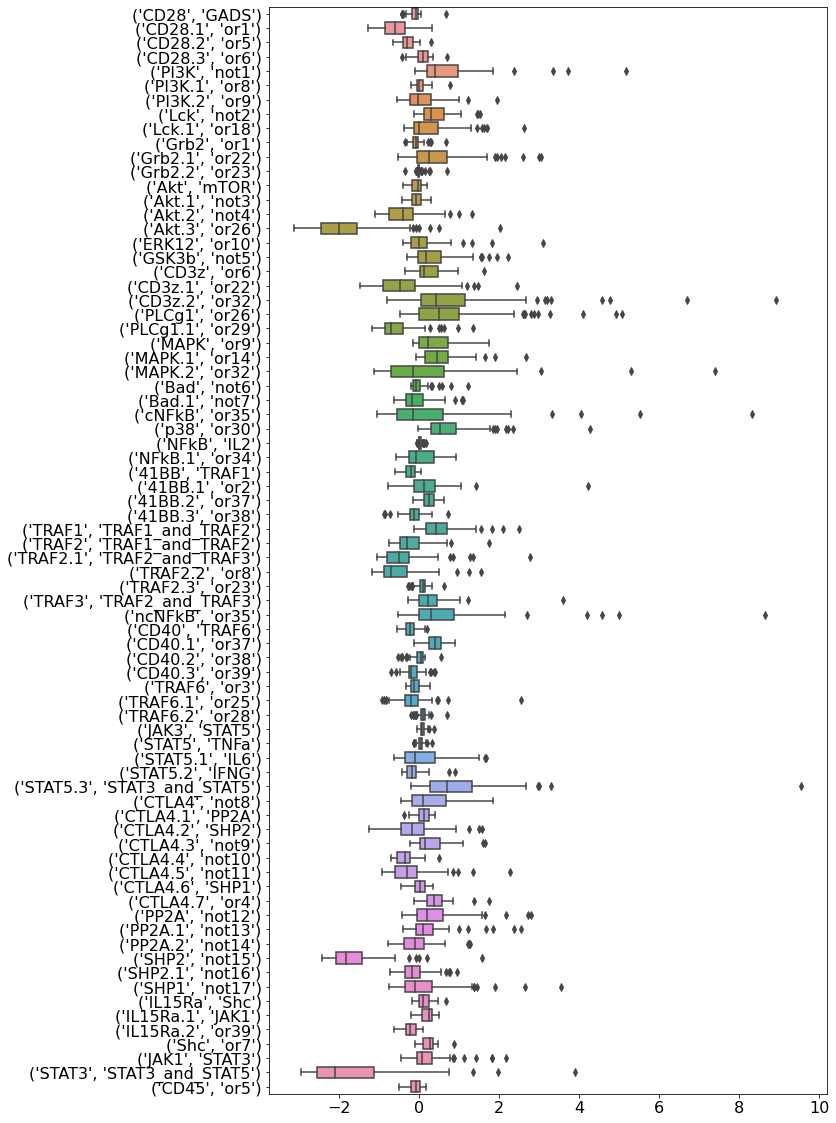

In [35]:
plt.figure(figsize = (10,20))
sns.boxplot(data = K_df_bool, orient = "h")

Variable error on parameters depending on the edges.

# Continuous inputs 5 replicates, manual network with noisy & continuous CARs

# Noisy inputs manual network & BioFuzzNet

In [36]:
RMSE_df_noisy = pd.read_csv("Hill_new_domains_noisy_CAR/CV_100_noisy//RMSE_df.csv", index_col = 0)
params_df_noisy = pd.read_csv("Hill_new_domains_noisy_CAR/CV_100_noisy/params_df.csv", index_col = 0)
test_set_df_noisy = pd.read_csv("Hill_new_domains_noisy_CAR/CV_100_noisy/test_set_df.csv", index_col = 0)

In [15]:
test_set_df_noisy

,test_1,test_2,test_3,test_4,test_5
0,8,11,12,13,14
1,5,7,9,11,14
2,5,8,11,12,13
3,5,7,10,12,13
4,9,10,12,13,14
...,...,...,...,...,...
95,5,6,8,10,12
96,5,6,9,13,14
97,5,6,7,8,10
98,6,7,10,11,13


In [16]:
# Is any test set used several times?
len(test_set_df_noisy.drop_duplicates())
# There is 18 duplicate test sets. I'll keep the corresponding rows for the analysis

#test_set_df_dream_unique = test_set_df_dream.drop_duplicates()
#test_set_df_dream_unique

82

In [17]:
RMSE_df_noisy

,CD28,PI3K,Lck,Grb2,GADS,Akt,AP1,ERK12,GSK3b,CD3z,...,CTLA4,PP2A,SHP2,SHP1,IL15Ra,Shc,JAK1,STAT3,cmyc,CD45
0,0.0,0.005368,0.004184,0.001173,1.967234e-03,0.000671,0.000144,0.001477,0.002171,0.000739,...,0.0,1.636735e-05,3.332182e-04,3.575528e-06,0.0,0.000161,0.038406,0.021268,0.000612,0.0
1,0.0,0.001262,0.003345,0.007733,4.120877e-03,0.000600,0.000064,0.000118,0.000629,0.000041,...,0.0,9.523895e-06,4.563035e-03,2.388164e-04,0.0,0.010752,0.020648,0.002189,0.000954,0.0
2,0.0,0.001262,0.009255,0.000920,1.537022e-04,0.000970,0.000078,0.000219,0.001188,0.000008,...,0.0,2.091559e-04,1.623400e-04,3.010075e-05,0.0,0.000247,0.019420,0.003051,0.002131,0.0
3,0.0,0.003328,0.001212,0.002843,7.956772e-04,0.010346,0.000120,0.000265,0.002266,0.001259,...,0.0,3.318306e-05,7.247668e-04,4.248948e-06,0.0,0.002259,0.002807,0.005817,0.001452,0.0
4,0.0,0.002819,0.004583,0.008052,2.071494e-03,0.001737,0.000202,0.000925,0.006562,0.000053,...,0.0,8.233838e-06,1.367133e-02,2.641777e-07,0.0,0.018845,0.016413,0.009195,0.002494,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.003305,0.020649,0.005495,2.519501e-03,0.010837,0.000122,0.000088,0.002824,0.000086,...,0.0,3.616982e-07,6.609447e-07,1.936228e-08,0.0,0.012515,0.012739,0.004280,0.002559,0.0
96,0.0,0.002976,0.002281,0.002590,7.667876e-03,0.002666,0.000097,0.000219,0.000777,0.000084,...,0.0,2.235927e-04,6.198470e-03,3.408768e-09,0.0,0.005880,0.000798,0.001209,0.001107,0.0
97,0.0,0.001381,0.001019,0.002479,4.099136e-17,0.004679,0.000194,0.000183,0.001146,0.000047,...,0.0,5.754704e-07,1.580080e-05,1.003039e-03,0.0,0.002985,0.002425,0.004833,0.001197,0.0
98,0.0,0.000671,0.031766,0.001290,2.719702e-03,0.006961,0.000050,0.000146,0.004180,0.000073,...,0.0,3.706864e-07,1.070986e-02,3.034521e-05,0.0,0.000021,0.011030,0.004242,0.001799,0.0


In [18]:
plt.rcParams['font.size'] = '16'

In [37]:
# Order nodes by distance to input nodes

input_nodes_noisy = ["CD28", "CTLA4", "IL15Ra", "CD45", "41BB", "CD40"]
nodes_of_interest_noisy = [c for c in RMSE_df_noisy if c not in input_nodes_noisy]


distance = {}
for node in nodes_of_interest_noisy:
    d = []
    for input_node in input_nodes_noisy:
        try:
            path = nx.bidirectional_shortest_path(manual_network, input_node, node)
            #path = [n for n in path if n in manual_network.biological_nodes]
            d.append(len(path))
        except Exception as e:
            #print(node, input_node)
            print("no path")
    d = max(d)
    distance[node] = d

# Sort by path length
distance = dict(sorted(distance.items(), key=lambda item: item[1]))
nodes_of_interest_noisy = list(distance.keys())


Lck CTLA4
no path
Lck IL15Ra
no path
Lck 41BB
no path
Lck CD40
no path
Grb2 41BB
no path
Grb2 CD40
no path
GADS CTLA4
no path
GADS IL15Ra
no path
GADS CD45
no path
GADS 41BB
no path
GADS CD40
no path
CD3z IL15Ra
no path
CD3z 41BB
no path
CD3z CD40
no path
PLCg1 41BB
no path
PLCg1 CD40
no path
TRAF1 CD28
no path
TRAF1 CTLA4
no path
TRAF1 IL15Ra
no path
TRAF1 CD45
no path
TRAF1 CD40
no path
TRAF2 CD28
no path
TRAF2 CTLA4
no path
TRAF2 IL15Ra
no path
TRAF2 CD45
no path
TRAF3 CD28
no path
TRAF3 CTLA4
no path
TRAF3 IL15Ra
no path
TRAF3 CD45
no path
ncNFkB CD28
no path
ncNFkB CTLA4
no path
ncNFkB IL15Ra
no path
ncNFkB CD45
no path
TRAF6 CD28
no path
TRAF6 CTLA4
no path
TRAF6 IL15Ra
no path
TRAF6 CD45
no path
TRAF6 41BB
no path
JAK3 CD28
no path
JAK3 CTLA4
no path
JAK3 CD45
no path
JAK3 41BB
no path
STAT5 CD28
no path
STAT5 CTLA4
no path
STAT5 CD45
no path
STAT5 41BB
no path
TNFa CD28
no path
TNFa CTLA4
no path
TNFa CD45
no path
TNFa 41BB
no path
IL6 CD28
no path
IL6 CTLA4
no path
IL6 CD45
no

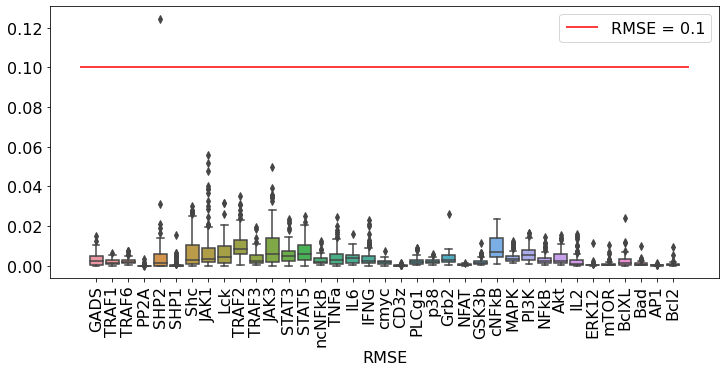

In [38]:
# Do a box plot for each node except the input nodes


plt.figure(figsize = (12,5))
ax = sns.boxplot(data = RMSE_df_noisy[nodes_of_interest_noisy], orient = "v")
plt.hlines( y = 0.1,xmin =-1, xmax = 37, label = "RMSE = 0.1", color = "r")
plt.xlabel("RMSE")
plt.xticks(rotation = 90)
plt.legend()


**Excellent performance as expected**


In [39]:
params_df_noisy =  params_df_noisy.reset_index(drop = True)
params_df_noisy

,CD28,CD28.1,CD28.2,CD28.3,PI3K,PI3K.1,PI3K.2,Lck,Lck.1,Grb2,...,SHP2,SHP2.1,SHP1,IL15Ra,IL15Ra.1,IL15Ra.2,Shc,JAK1,STAT3,CD45
0,GADS,or1,or5,or6,not1,or8,or9,not2,or18,or1,...,not15,not16,not17,Shc,JAK1,or39,or7,STAT3,STAT3_and_STAT5,or5
1,0.4298300537749811,-1.2996457399850714,1.3157675139904201,-0.2041515730086226,-0.9948605075239526,0.9593161784266082,-0.8919315303139721,-0.0771036969030355,0.1392694038002189,0.8182531562510627,...,0.8494543558875538,-0.6813296697311465,0.14869603501971237,0.21806479660990188,-1.1376172643636697,0.6776304812559875,-0.9411551951339787,0.5577132332593382,1.8056216929382405,0.32494285803313816
2,-0.09428943871993514,0.2981485756402372,-0.28555470395222493,-0.544469743224835,-1.4309728834104207,-1.2442844421291577,-0.5002468463607065,-1.2123223385375568,-0.8263860160137009,-0.7537562732094691,...,0.9390777205919631,-0.2662029296920856,-0.23889093804319095,-1.3137514469606781,-0.5128881316155999,-0.27362088996917255,-1.1892696200562178,-0.012462010654134742,1.1436809489266586,-0.413600684227982
3,"[0.5448917037173922, -0.2864167872908485]","[-0.7651615581181667, 0.5494694941046316]","[0.8897264522690217, -0.040533317680214266]","[-0.23627931005431319, -0.5298545190437879]","[-1.0219338764254822, -0.45560358414518864]","[1.3523609016718918, -0.7170934650963618]","[0.8404291024445754, -0.7323698065814424]","[0.2106522468846769, -0.35022805692858944]","[-0.14718703486772994, -0.2105983273789077]","[0.17064048760406272, -1.4577075182781658]",...,"[0.5825606292057729, -0.23514577331067807]","[-0.6146237571579488, 0.5531636077228392]","[-0.13996623060773553, 0.8201275139888684]","[0.21588083252516746, -1.3164012987037734]","[-0.24746015418773937, -0.2758880007356178]","[0.6474307490406658, -0.2772431539671027]","[-0.6191347292307715, -0.2600316303477977]","[0.7736846183207183, -0.1332160935159813]","[1.2089011635313796, 0.12251741438607246]","[0.11606492999069873, -0.4777082499059814]"
4,"[0.17938295351656502, 0.423808406711405]","[-0.875448672603311, -0.3482630883263328]","[0.1562633856688815, 1.2768834827692745]","[-0.2552366704056395, -0.3542191018727225]","[1.3868630218305258, -0.7127791426167231]","[0.8186690856459804, -1.1180696207254348]","[0.9438045369763789, -0.2943002522723493]","[-0.6266627830509967, -0.6052504424281862]","[-0.46400931431999176, 0.2236178920113681]","[0.07233503637262037, -1.360164817918978]",...,"[1.2780791779904201, 0.6469194229418864]","[-0.7020045149917424, -0.1269421884648658]","[-0.18962744666638962, -0.8976785159946941]","[0.4033621785174435, -1.108354954789254]","[-0.6035600870809966, -0.35027573605881124]","[0.6723168813098228, -0.2714173137380209]","[0.36971881145601276, 0.03102641347270394]","[0.04204063016582389, 0.4046955511529337]","[1.0514005800086748, 0.9155619300058383]","[0.33721491888510846, -0.3931361484717509]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,"[0.5767855064393635, -0.33501269004574236]","[0.027986602054037583, -0.5056606832388246]","[-0.7858800984654328, 2.1938286138224457]","[0.15611006568074523, -0.792222567910271]","[0.11517252630917296, -0.208297942066354]","[0.17332850468718572, 0.1584878839288489]","[-0.9112230309664465, -2.15563162515428]","[0.15421773806082234, -1.5073895621312952]","[0.9938814734718397, -2.4032521228999584]","[0.51876167201227, -1.158817784702916]",...,"[-0.7661866231539244, 0.35042729281735546]","[-1.0406601002375426, 0.43373503434134036]","[-1.7374400157192422, -0.5958626530187917]","[0.4691098242354946, -1.0450292819114286]","[-0.787968571652682, -0.3990337383814791]","[-0.2181748412571656, -0.6193296752799637]","[0.006002347074572875, 0.2975437192340653]","[-0.14333604868076572, 0.6197917503502792]","[0.5875197788256574, 1.0493069206336543]","[-1.112154320137801, -0.8002195273515116]"
99,"[-0.05210403961697393, 1.054150796324865]","[-0.5042106602608789, -0.4343644101230983]","[1.085956136995357, -0.27326959351954494]","[-0.15796990942139755, -0.5479773387825019]","

In [40]:
# It'd also be interesting to see the distribution of n/K parameters: do we always converge to a similar network?

# Set up the transfer edges name
n_params = {}
K_params = {}
for node1 in params_df_noisy.columns:
    node2 = params_df_noisy.loc[0, node1]
    n_params[(node1, node2)] = [exp(float(params_df_noisy.loc[1, node1]))]
    K_params[(node1, node2)] = [exp(float(params_df_noisy.loc[2, node1]))]
    for i in range(3, len(params_df_noisy)):
        str_val = params_df_noisy.loc[i, node1].split(",")
        n = float(str_val[0][1:])
        K = float(str_val[1][:-1])
        n_params[(node1, node2)].append(exp(n))
        K_params[(node1, node2)].append(exp(K))

# The first value of each list is the one that was used to generate the data
for k in n_params.keys():
    n_params[k] = [n_params[k][i] - n_params[k][0] for i in range(len(n_params))]
    K_params[k] = [K_params[k][i] - K_params[k][0] for i in range(len(K_params))]
n_df_noisy = pd.DataFrame(n_params)
K_df_noisy = pd.DataFrame(K_params)

<AxesSubplot:>

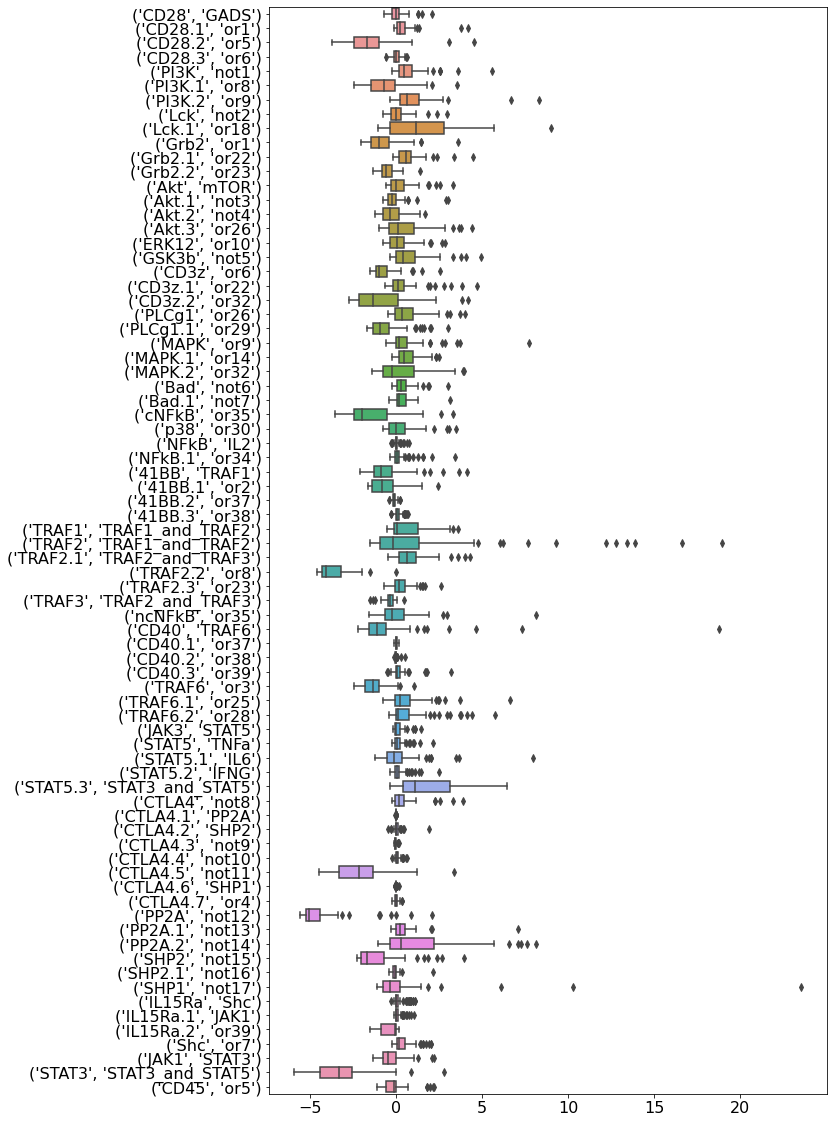

In [52]:
plt.figure(figsize = (10,20))
sns.boxplot(data = n_df_noisy, orient = "h")

<AxesSubplot:>

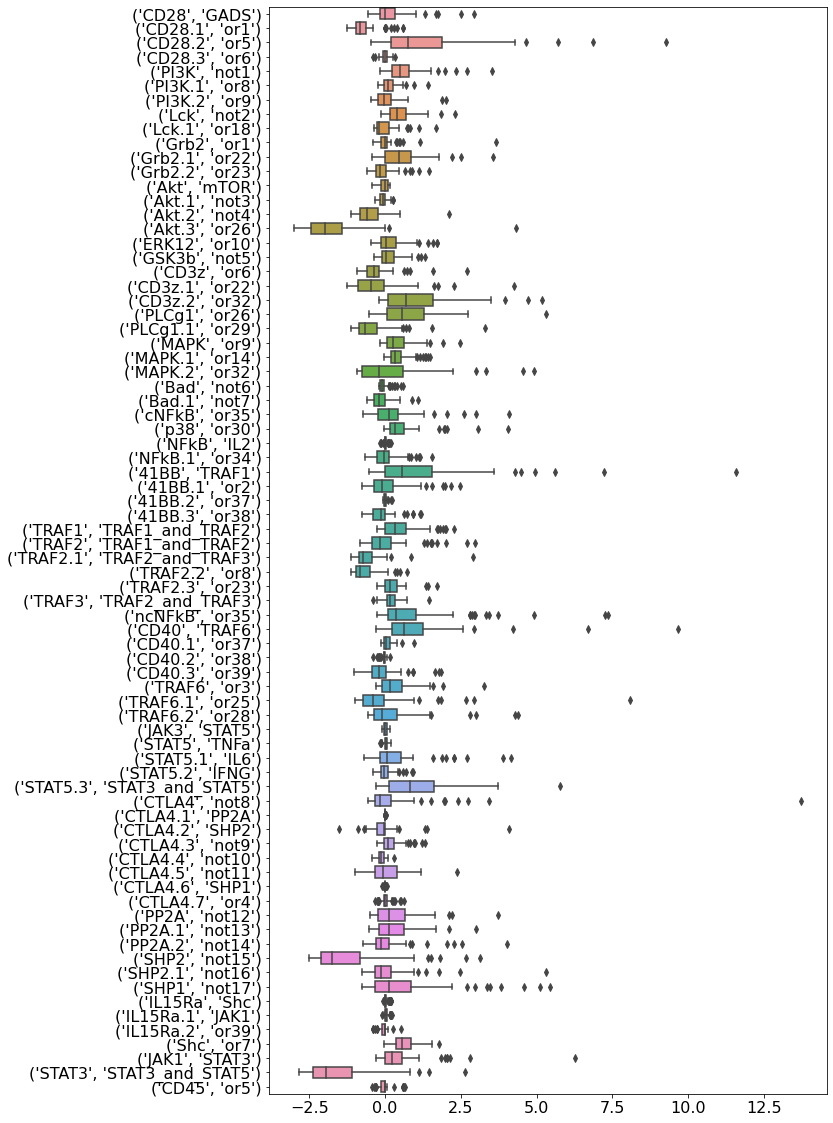

In [53]:
plt.figure(figsize = (10,20))
sns.boxplot(data = K_df_noisy, orient = "h")

Variable error on parameters depending on the edges.

# Hill Continuous

In [44]:
RMSE_df_cont = pd.read_csv("Hill_new_domains_continuous_CAR/CV_100_continuous/RMSE_df.csv", index_col = 0)
params_df_cont = pd.read_csv("Hill_new_domains_continuous_CAR/CV_100_continuous/params_df.csv", index_col = 0)
test_set_df_cont = pd.read_csv("Hill_new_domains_continuous_CAR/CV_100_continuous/test_set_df.csv", index_col = 0)

In [45]:
test_set_df_cont

,test_1,test_2,test_3,test_4,test_5
0,8,11,12,13,14
1,5,7,9,11,14
2,5,8,11,12,13
3,5,7,10,12,13
4,9,10,12,13,14
...,...,...,...,...,...
95,5,6,8,10,12
96,5,6,9,13,14
97,5,6,7,8,10
98,6,7,10,11,13


In [46]:
# Is any test set used several times?
len(test_set_df_cont.drop_duplicates())
# There is 18 duplicate test sets. I'll keep the corresponding rows for the analysis

#test_set_df_dream_unique = test_set_df_dream.drop_duplicates()
#test_set_df_dream_unique

82

In [47]:
RMSE_df_cont

,CD28,PI3K,Lck,Grb2,GADS,Akt,AP1,ERK12,GSK3b,CD3z,...,CTLA4,PP2A,SHP2,SHP1,IL15Ra,Shc,JAK1,STAT3,cmyc,CD45
0,0.0,0.002745,0.000060,0.004591,1.174856e-06,0.001597,0.000053,0.000066,0.002025,0.003370,...,0.0,4.193857e-05,0.000011,7.709625e-06,0.0,0.000511,0.005532,0.007545,0.002423,0.0
1,0.0,0.003817,0.000044,0.012467,3.986866e-13,0.002888,0.000577,0.000060,0.001649,0.003184,...,0.0,8.073285e-06,0.000245,7.637544e-07,0.0,0.003649,0.005370,0.003020,0.001998,0.0
2,0.0,0.005102,0.000079,0.003482,1.131829e-13,0.001526,0.000101,0.000054,0.002334,0.000029,...,0.0,1.079789e-06,0.001809,3.541463e-08,0.0,0.000471,0.006536,0.010877,0.000948,0.0
3,0.0,0.006219,0.000097,0.005720,4.255364e-14,0.002056,0.000074,0.000020,0.003234,0.003770,...,0.0,1.383420e-04,0.000007,5.522581e-05,0.0,0.000516,0.007084,0.006118,0.000816,0.0
4,0.0,0.003742,0.000041,0.012763,8.960729e-07,0.002097,0.000145,0.000019,0.001255,0.003079,...,0.0,1.154276e-05,0.001938,5.121420e-06,0.0,0.000136,0.000941,0.000864,0.001392,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.004193,0.000028,0.001021,1.325940e-12,0.002220,0.000023,0.000017,0.000932,0.000902,...,0.0,1.263405e-06,0.000536,8.279567e-07,0.0,0.000180,0.002576,0.005405,0.000083,0.0
96,0.0,0.004831,0.000094,0.012867,9.339505e-15,0.001445,0.000339,0.000027,0.003185,0.003687,...,0.0,1.434995e-06,0.000568,1.045406e-02,0.0,0.000932,0.001491,0.002036,0.001100,0.0
97,0.0,0.004486,0.000241,0.001104,1.876239e-05,0.000751,0.000063,0.000009,0.003796,0.000142,...,0.0,9.187989e-08,0.000002,8.126476e-07,0.0,0.000002,0.002364,0.001396,0.001437,0.0
98,0.0,0.001390,0.000146,0.003800,9.344078e-15,0.001561,0.000460,0.000005,0.002410,0.000614,...,0.0,2.123251e-06,0.000040,5.754760e-07,0.0,0.000495,0.002726,0.005749,0.002737,0.0


In [48]:
plt.rcParams['font.size'] = '16'

In [49]:
# Order nodes by distance to input nodes

input_nodes_cont = ["CD28", "CTLA4", "IL15Ra", "CD45", "41BB", "CD40"]
nodes_of_interest_cont = [c for c in RMSE_df_cont if c not in input_nodes_cont]


distance = {}
for node in nodes_of_interest_cont:
    d = []
    for input_node in input_nodes_cont:
        try:
            path = nx.bidirectional_shortest_path(manual_network, input_node, node)
            #path = [n for n in path if n in manual_network.biological_nodes]
            d.append(len(path))
        except Exception as e:
            #print(node, input_node)
            print("no path")
    d = max(d)
    distance[node] = d

# Sort by path length
distance = dict(sorted(distance.items(), key=lambda item: item[1]))
nodes_of_interest_cont = list(distance.keys())


no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path


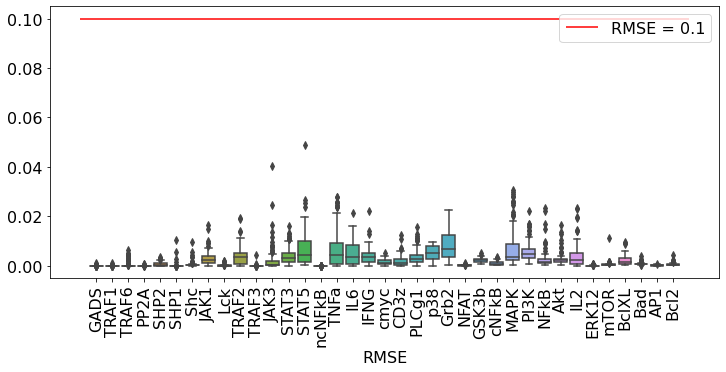

In [50]:
# Do a box plot for each node except the input nodes


plt.figure(figsize = (12,5))
ax = sns.boxplot(data = RMSE_df_cont[nodes_of_interest_cont], orient = "v")
plt.hlines( y = 0.1,xmin =-1, xmax = 37, label = "RMSE = 0.1", color = "r")
plt.xlabel("RMSE")
plt.xticks(rotation = 90)
plt.legend()


**Excellent performance as expected**


In [39]:
params_df_cont =  params_df_cont.reset_index(drop = True)
params_df_cont

,CD28,CD28.1,CD28.2,CD28.3,PI3K,PI3K.1,PI3K.2,Lck,Lck.1,Grb2,...,SHP2,SHP2.1,SHP1,IL15Ra,IL15Ra.1,IL15Ra.2,Shc,JAK1,STAT3,CD45
0,GADS,or1,or5,or6,not1,or8,or9,not2,or18,or1,...,not15,not16,not17,Shc,JAK1,or39,or7,STAT3,STAT3_and_STAT5,or5
1,0.4298300537749811,-1.2996457399850714,1.3157675139904201,-0.2041515730086226,-0.9948605075239526,0.9593161784266082,-0.8919315303139721,-0.0771036969030355,0.1392694038002189,0.8182531562510627,...,0.8494543558875538,-0.6813296697311465,0.14869603501971237,0.21806479660990188,-1.1376172643636697,0.6776304812559875,-0.9411551951339787,0.5577132332593382,1.8056216929382405,0.32494285803313816
2,-0.09428943871993514,0.2981485756402372,-0.28555470395222493,-0.544469743224835,-1.4309728834104207,-1.2442844421291577,-0.5002468463607065,-1.2123223385375568,-0.8263860160137009,-0.7537562732094691,...,0.9390777205919631,-0.2662029296920856,-0.23889093804319095,-1.3137514469606781,-0.5128881316155999,-0.27362088996917255,-1.1892696200562178,-0.012462010654134742,1.1436809489266586,-0.413600684227982
3,"[0.5448917037173922, -0.2864167872908485]","[-0.7651615581181667, 0.5494694941046316]","[0.8897264522690217, -0.040533317680214266]","[-0.23627931005431319, -0.5298545190437879]","[-1.0219338764254822, -0.45560358414518864]","[1.3523609016718918, -0.7170934650963618]","[0.8404291024445754, -0.7323698065814424]","[0.2106522468846769, -0.35022805692858944]","[-0.14718703486772994, -0.2105983273789077]","[0.17064048760406272, -1.4577075182781658]",...,"[0.5825606292057729, -0.23514577331067807]","[-0.6146237571579488, 0.5531636077228392]","[-0.13996623060773553, 0.8201275139888684]","[0.21588083252516746, -1.3164012987037734]","[-0.24746015418773937, -0.2758880007356178]","[0.6474307490406658, -0.2772431539671027]","[-0.6191347292307715, -0.2600316303477977]","[0.7736846183207183, -0.1332160935159813]","[1.2089011635313796, 0.12251741438607246]","[0.11606492999069873, -0.4777082499059814]"
4,"[0.17938295351656502, 0.423808406711405]","[-0.875448672603311, -0.3482630883263328]","[0.1562633856688815, 1.2768834827692745]","[-0.2552366704056395, -0.3542191018727225]","[1.3868630218305258, -0.7127791426167231]","[0.8186690856459804, -1.1180696207254348]","[0.9438045369763789, -0.2943002522723493]","[-0.6266627830509967, -0.6052504424281862]","[-0.46400931431999176, 0.2236178920113681]","[0.07233503637262037, -1.360164817918978]",...,"[1.2780791779904201, 0.6469194229418864]","[-0.7020045149917424, -0.1269421884648658]","[-0.18962744666638962, -0.8976785159946941]","[0.4033621785174435, -1.108354954789254]","[-0.6035600870809966, -0.35027573605881124]","[0.6723168813098228, -0.2714173137380209]","[0.36971881145601276, 0.03102641347270394]","[0.04204063016582389, 0.4046955511529337]","[1.0514005800086748, 0.9155619300058383]","[0.33721491888510846, -0.3931361484717509]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,"[0.5767855064393635, -0.33501269004574236]","[0.027986602054037583, -0.5056606832388246]","[-0.7858800984654328, 2.1938286138224457]","[0.15611006568074523, -0.792222567910271]","[0.11517252630917296, -0.208297942066354]","[0.17332850468718572, 0.1584878839288489]","[-0.9112230309664465, -2.15563162515428]","[0.15421773806082234, -1.5073895621312952]","[0.9938814734718397, -2.4032521228999584]","[0.51876167201227, -1.158817784702916]",...,"[-0.7661866231539244, 0.35042729281735546]","[-1.0406601002375426, 0.43373503434134036]","[-1.7374400157192422, -0.5958626530187917]","[0.4691098242354946, -1.0450292819114286]","[-0.787968571652682, -0.3990337383814791]","[-0.2181748412571656, -0.6193296752799637]","[0.006002347074572875, 0.2975437192340653]","[-0.14333604868076572, 0.6197917503502792]","[0.5875197788256574, 1.0493069206336543]","[-1.112154320137801, -0.8002195273515116]"
99,"[-0.05210403961697393, 1.054150796324865]","[-0.5042106602608789, -0.4343644101230983]","[1.085956136995357, -0.27326959351954494]","[-0.15796990942139755, -0.5479773387825019]","

In [54]:
# It'd also be interesting to see the distribution of n/K parameters: do we always converge to a similar network?

# Set up the transfer edges name
n_params = {}
K_params = {}
for node1 in params_df_cont.columns:
    node2 = params_df_cont.loc[0, node1]
    print(node1)
    n_params[(node1, node2)] = [exp(float(params_df_cont.loc[1, node1]))]
    K_params[(node1, node2)] = [exp(float(params_df_cont.loc[2, node1]))]
    for i in range(3, len(params_df_cont)):
        str_val = params_df_noisy.loc[i, node1].split(",")
        n = float(str_val[0][1:])
        K = float(str_val[1][:-1])
        n_params[(node1, node2)].append(exp(n))
        K_params[(node1, node2)].append(exp(K))

# The first value of each list is the one that was used to generate the data
for k in n_params.keys():
    n_params[k] = [n_params[k][i] - n_params[k][0] for i in range(len(n_params))]
    K_params[k] = [K_params[k][i] - K_params[k][0] for i in range(len(K_params))]
n_df_noisy = pd.DataFrame(n_params)
K_df_noisy = pd.DataFrame(K_params)

CD28


ValueError: could not convert string to float: '[-0.41728016101543736, -0.5218940476863287]'

<AxesSubplot:>

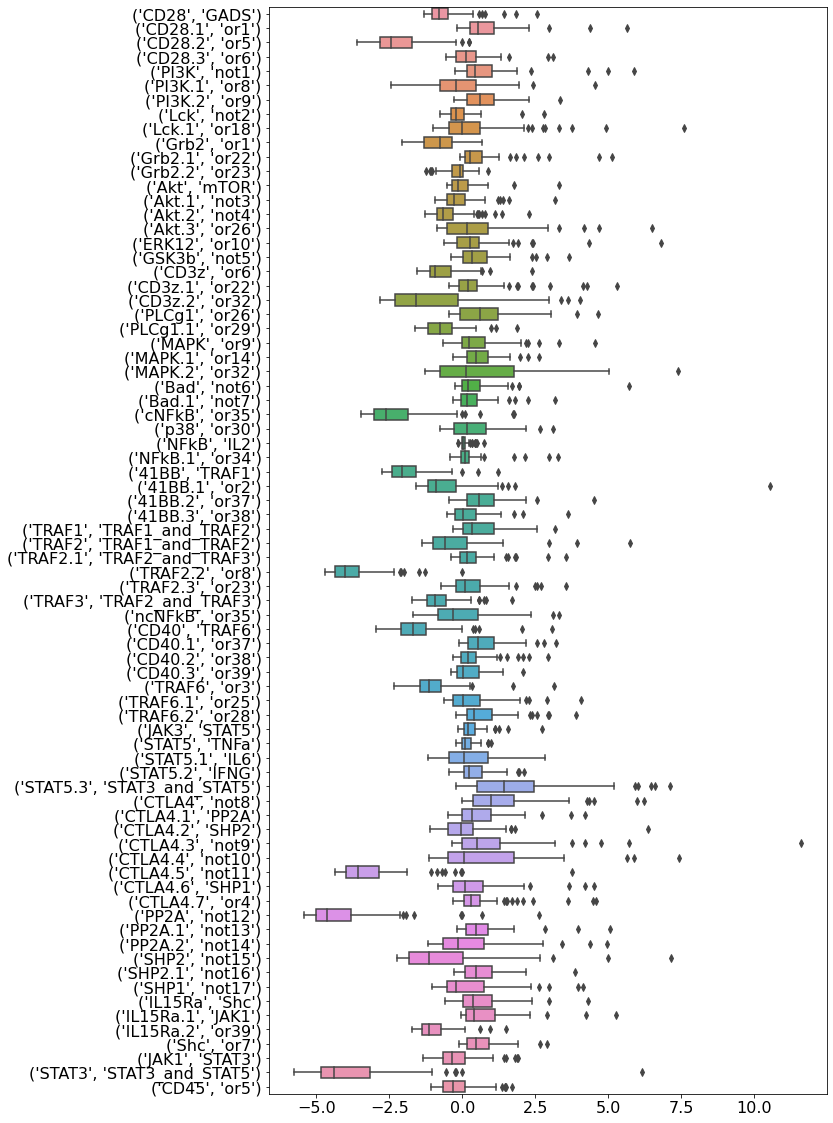

In [41]:
plt.figure(figsize = (10,20))
sns.boxplot(data = n_df_cont, orient = "h")

<AxesSubplot:>

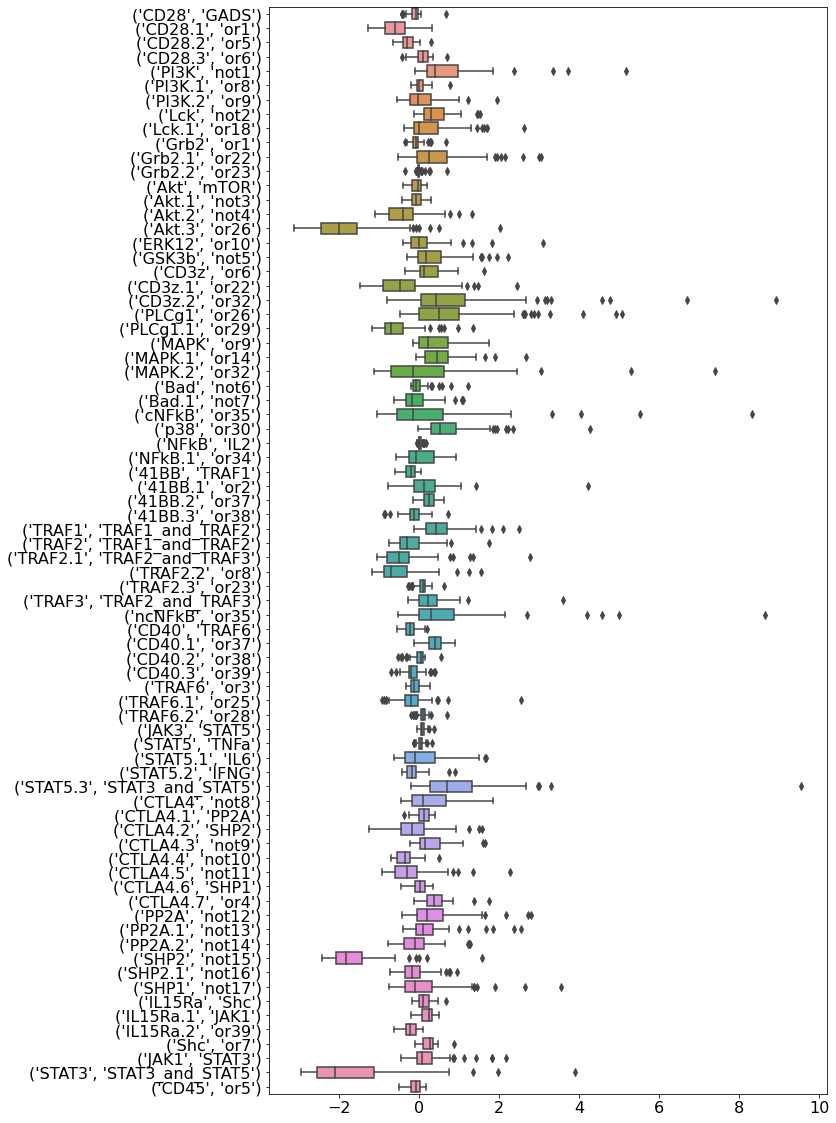

In [42]:
plt.figure(figsize = (10,20))
sns.boxplot(data = K_df_cont, orient = "h")

Variable error on parameters depending on the edges.

# BioMixNet cross-validation on 10 datasets

The network used was the reduced manual network
batchsize 200 epochs 300 leaning rate 5e-3


In [61]:
model_0 = pickle.load(open("biomixnets_test/CV_dataset/CV_0/model.p", "rb"))
model_0_true = pickle.load(open("biomixnets_test/CV_dataset/CV_0/model_structure_data.p", "rb"))
ground_truth_0 = pickle.load(open("biomixnets_test/CV_dataset/CV_0/test_ground_truth.p", "rb"))

model_1 = pickle.load(open("biomixnets_test/CV_dataset/CV_1/model.p", "rb"))
model_1_true = pickle.load(open("biomixnets_test/CV_dataset/CV_1/model_structure_data.p", "rb"))
ground_truth_1 = pickle.load(open("biomixnets_test/CV_dataset/CV_1/test_ground_truth.p", "rb"))

model_2 = pickle.load(open("biomixnets_test/CV_dataset/CV_2/model.p", "rb"))
model_2_true = pickle.load(open("biomixnets_test/CV_dataset/CV_2/model_structure_data.p", "rb"))
ground_truth_2 = pickle.load(open("biomixnets_test/CV_dataset/CV_2/test_ground_truth.p", "rb"))

model_3 = pickle.load(open("biomixnets_test/CV_dataset/CV_3/model.p", "rb"))
model_3_true = pickle.load(open("biomixnets_test/CV_dataset/CV_3/model_structure_data.p", "rb"))
ground_truth_3 = pickle.load(open("biomixnets_test/CV_dataset/CV_3/test_ground_truth.p", "rb"))

model_4 = pickle.load(open("biomixnets_test/CV_dataset/CV_4/model.p", "rb"))
model_4_true = pickle.load(open("biomixnets_test/CV_dataset/CV_4/model_structure_data.p", "rb"))
ground_truth_4 = pickle.load(open("biomixnets_test/CV_dataset/CV_4/test_ground_truth.p", "rb"))

model_5 = pickle.load(open("biomixnets_test/CV_dataset/CV_5/model.p", "rb"))
model_5_true = pickle.load(open("biomixnets_test/CV_dataset/CV_5/model_structure_data.p", "rb"))
ground_truth_5 = pickle.load(open("biomixnets_test/CV_dataset/CV_5/test_ground_truth.p", "rb"))

model_6 = pickle.load(open("biomixnets_test/CV_dataset/CV_6/model.p", "rb"))
model_6_true = pickle.load(open("biomixnets_test/CV_dataset/CV_6/model_structure_data.p", "rb"))
ground_truth_6 = pickle.load(open("biomixnets_test/CV_dataset/CV_6/test_ground_truth.p", "rb"))

model_7 = pickle.load(open("biomixnets_test/CV_dataset/CV_7/model.p", "rb"))
model_7_true = pickle.load(open("biomixnets_test/CV_dataset/CV_7/model_structure_data.p", "rb"))
ground_truth_7 = pickle.load(open("biomixnets_test/CV_dataset/CV_7/test_ground_truth.p", "rb"))

model_8 = pickle.load(open("biomixnets_test/CV_dataset/CV_8/model.p", "rb"))
model_8_true = pickle.load(open("biomixnets_test/CV_dataset/CV_8/model_structure_data.p", "rb"))
ground_truth_8 = pickle.load(open("biomixnets_test/CV_dataset/CV_8/test_ground_truth.p", "rb"))

model_9 = pickle.load(open("biomixnets_test/CV_dataset/CV_9/model.p", "rb"))
model_9_true = pickle.load(open("biomixnets_test/CV_dataset/CV_9/model_structure_data.p", "rb"))
ground_truth_9 = pickle.load(open("biomixnets_test/CV_dataset/CV_9/test_ground_truth.p", "rb"))

In [62]:
CV_models = [model_0, model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9]
CV_models_true = [model_0_true, model_1_true, model_2_true, model_3_true, model_4_true, model_5_true, model_6_true, model_7_true, model_8_true, model_9_true]
CV_ground_truth = [ground_truth_0, ground_truth_1, ground_truth_2, ground_truth_3, ground_truth_4, ground_truth_5, ground_truth_6, ground_truth_7, ground_truth_8, ground_truth_9]

In [69]:
def analyse_biomixnet_random_gates_results(model, ground_truth_model,  ground_truth: dict):
    model.set_network_ground_truth(ground_truth)
    model.sequential_update(model.root_nodes)
    output_states = model.output_states
    
    print("Predictions vs Ground truth")
    # print the output
    for node in model.biological_nodes:
        if node not in model.root_nodes:
            plt.scatter(ground_truth[node].detach().numpy(), output_states[node].detach().numpy(), s=3)
    ident = np.linspace(0,1,100)
    plt.plot(ident, ident, "--k", alpha = 0.02)
    plt.show()
    
    print("RMSE on the predictions")
    RMSE = utils.compute_RMSE_outputs(model, ground_truth)
    print(f"MAX RMSE is {max(RMSE.values())}.")
    
    print("Look at the gate parameter")
    for gate in model.mixed_gates:
        print(ground_truth_model.nodes()[gate]["node_type"], torch.sigmoid(model.nodes()[gate]["gate"].AND_param))
        d=[]
        for input_node in model.root_nodes:
            try:
                path = nx.bidirectional_shortest_path(model, input_node, gate)
                #path = [n for n in path if n in DREAM_model.biological_nodes]
                d.append(len(path))
            except Exception as e:
                print("no path")
        d = max(d)
        print(f"node depth is {d}")




---- MODEL 0 ----
Predictions vs Ground truth


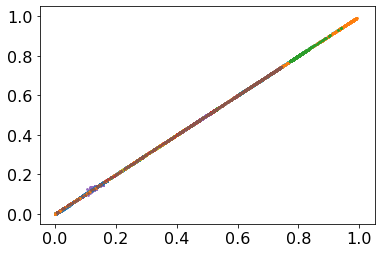

RMSE on the predictions
MAX RMSE is 0.005459503283470572.
Look at the gate parameter
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 1 ----
Predictions vs Ground truth


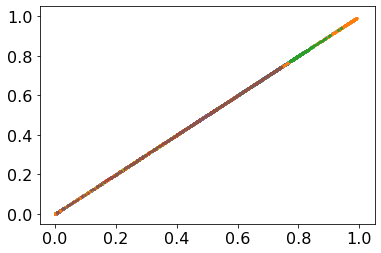

RMSE on the predictions
MAX RMSE is 0.00048127476184430115.
Look at the gate parameter
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 2 ----
Predictions vs Ground truth


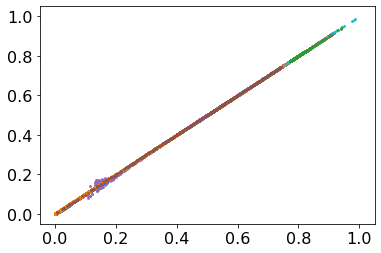

RMSE on the predictions
MAX RMSE is 0.006255217976004471.
Look at the gate parameter
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 3 ----
Predictions vs Ground truth


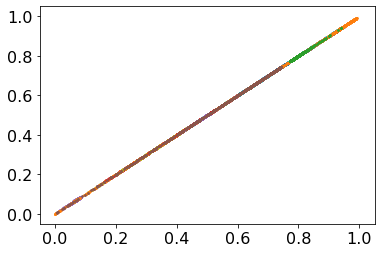

RMSE on the predictions
MAX RMSE is 0.001067555858729138.
Look at the gate parameter
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 4 ----
Predictions vs Ground truth


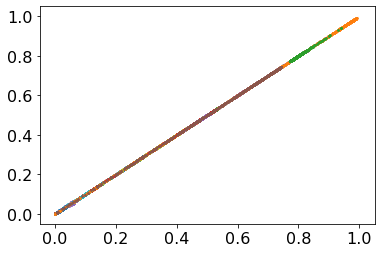

RMSE on the predictions
MAX RMSE is 0.0022426539760858075.
Look at the gate parameter
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 5 ----
Predictions vs Ground truth


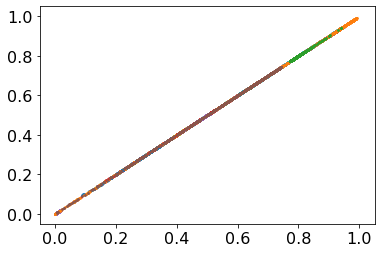

RMSE on the predictions
MAX RMSE is 0.0006766010865019981.
Look at the gate parameter
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 6 ----
Predictions vs Ground truth


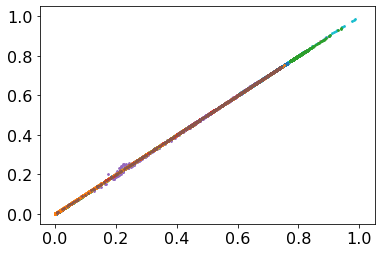

RMSE on the predictions
MAX RMSE is 0.005047854000800828.
Look at the gate parameter
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 7 ----
Predictions vs Ground truth


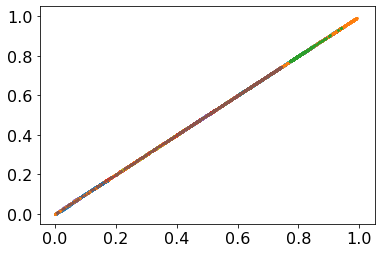

RMSE on the predictions
MAX RMSE is 0.0012758221387521326.
Look at the gate parameter
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 8 ----
Predictions vs Ground truth


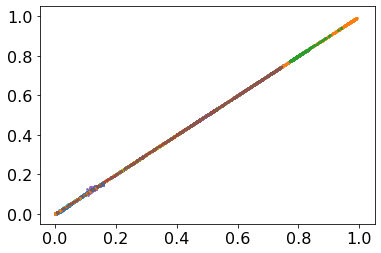

RMSE on the predictions
MAX RMSE is 0.005454378282522209.
Look at the gate parameter
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2
---- MODEL 9 ----
Predictions vs Ground truth


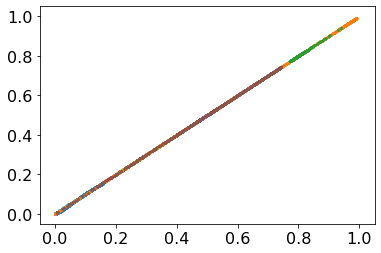

RMSE on the predictions
MAX RMSE is 0.002077404495724984.
Look at the gate parameter
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 7
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 5
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
node depth is 4
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_AND tensor(0.9991, grad_fn=<SigmoidBackward0>)
no path
node depth is 3
logic_gate_OR tensor(0.0009, grad_fn=<SigmoidBackward0>)
node depth is 2


In [70]:
for i in range(10):
    print(f"---- MODEL {i} ----")
    analyse_biomixnet_random_gates_results(model = CV_models[i], ground_truth_model=CV_models_true[i], ground_truth=CV_ground_truth[i])

In [84]:
def analyse_biomixnet_CV(CV_model, CV_ground_truth_model):
    df_list = []
    for i in range(len(CV_model)):
        df  = pd.DataFrame(columns = [f"Model {i}"])
        s = []
        model = CV_model[i]
        ground_truth_model = CV_ground_truth_model[i]
        for gate in model.mixed_gates:
            true_gate = ground_truth_model.nodes()[gate]["node_type"].split("_")[-1]
            s.append(true_gate)
            if true_gate=="OR":
                s.append(torch.sigmoid(model.nodes()[gate]["gate"].AND_param).item() <=0.5)
            else:
                s.append(torch.sigmoid(model.nodes()[gate]["gate"].AND_param).item() >=0.5)
        df[f"Model {i}"] = pd.Series(s)
        df_list.append(df)
    return pd.concat(df_list, axis = 1)



In [86]:
results_df = analyse_biomixnet_CV(CV_models, CV_models_true)
results_df

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9
0,AND,OR,AND,OR,AND,OR,AND,AND,AND,OR
1,True,True,True,True,True,True,True,True,True,True
2,AND,OR,AND,OR,AND,OR,OR,OR,AND,OR
3,True,True,True,True,True,True,True,True,True,True
4,AND,AND,OR,OR,OR,AND,OR,OR,AND,AND
5,True,True,True,False,False,True,True,False,True,True
6,OR,AND,OR,AND,AND,AND,OR,AND,OR,AND
7,False,True,True,True,True,True,True,True,False,True
8,AND,AND,OR,OR,AND,OR,AND,OR,AND,AND
9,True,True,True,True,True,True,True,True,True,True


In [88]:
results_df.index = ["gate_1.1", "gate_1.2", 
                   "gate_2.1", "gate_2.2",
                   "gate_3.1", "gate_3.2",
                   "gate_4.1", "gate_4.2",
                   "gate_5.1", "gate_5.2",
                   "gate_6.1", "gate_6.2",
                    "gate_7.1", "gate_7.2",
                    "gate_8.1", "gate_8.2",
                    "gate_9.1", "gate_9.2"]
results_df

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9
gate_1.1,AND,OR,AND,OR,AND,OR,AND,AND,AND,OR
gate_1.2,True,True,True,True,True,True,True,True,True,True
gate_2.1,AND,OR,AND,OR,AND,OR,OR,OR,AND,OR
gate_2.2,True,True,True,True,True,True,True,True,True,True
gate_3.1,AND,AND,OR,OR,OR,AND,OR,OR,AND,AND
gate_3.2,True,True,True,False,False,True,True,False,True,True
gate_4.1,OR,AND,OR,AND,AND,AND,OR,AND,OR,AND
gate_4.2,False,True,True,True,True,True,True,True,False,True
gate_5.1,AND,AND,OR,OR,AND,OR,AND,OR,AND,AND
gate_5.2,True,True,True,True,True,True,True,True,True,True


In [90]:
results_df["Depth"] = [7,7,3,3,4,4,5,5,4,4,3,3,3,3,3,3,2,2]
results_df

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Depth
gate_1.1,AND,OR,AND,OR,AND,OR,AND,AND,AND,OR,7
gate_1.2,True,True,True,True,True,True,True,True,True,True,7
gate_2.1,AND,OR,AND,OR,AND,OR,OR,OR,AND,OR,3
gate_2.2,True,True,True,True,True,True,True,True,True,True,3
gate_3.1,AND,AND,OR,OR,OR,AND,OR,OR,AND,AND,4
gate_3.2,True,True,True,False,False,True,True,False,True,True,4
gate_4.1,OR,AND,OR,AND,AND,AND,OR,AND,OR,AND,5
gate_4.2,False,True,True,True,True,True,True,True,False,True,5
gate_5.1,AND,AND,OR,OR,AND,OR,AND,OR,AND,AND,4
gate_5.2,True,True,True,True,True,True,True,True,True,True,4


In [92]:
gates_df = results_df.loc[[f"gate_{i}.1" for i in range(1,10)],:]
bool_df = results_df.loc[[f"gate_{i}.2" for i in range(1,10)],:]
gates_df

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Depth
gate_1.1,AND,OR,AND,OR,AND,OR,AND,AND,AND,OR,7
gate_2.1,AND,OR,AND,OR,AND,OR,OR,OR,AND,OR,3
gate_3.1,AND,AND,OR,OR,OR,AND,OR,OR,AND,AND,4
gate_4.1,OR,AND,OR,AND,AND,AND,OR,AND,OR,AND,5
gate_5.1,AND,AND,OR,OR,AND,OR,AND,OR,AND,AND,4
gate_6.1,OR,OR,OR,OR,AND,OR,OR,OR,AND,AND,3
gate_7.1,OR,OR,OR,OR,AND,AND,OR,OR,OR,OR,3
gate_8.1,AND,OR,AND,OR,AND,OR,OR,AND,AND,AND,3
gate_9.1,OR,OR,AND,OR,OR,OR,AND,OR,OR,OR,2


In [93]:
bool_df

,Model 0,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Depth
gate_1.2,True,True,True,True,True,True,True,True,True,True,7
gate_2.2,True,True,True,True,True,True,True,True,True,True,3
gate_3.2,True,True,True,False,False,True,True,False,True,True,4
gate_4.2,False,True,True,True,True,True,True,True,False,True,5
gate_5.2,True,True,True,True,True,True,True,True,True,True,4
gate_6.2,True,True,True,True,True,True,True,True,True,True,3
gate_7.2,False,True,False,True,True,False,True,False,False,False,3
gate_8.2,True,True,True,True,True,True,True,True,True,True,3
gate_9.2,True,True,True,True,True,True,True,True,True,True,2


Errors are concentrated at certain positions:
* gate 3: 3 errors (depth 4)
* gate 4: 2 errors (depth 5)
* gate 7: 6 errors (depth 3)

Most frequently, an OR is confused for an AND: 10 out of 11 mistakes. Could be due to range of values.
Most errors in a model:2
Average number of errors for the 10 models:
2+0+1+1+1+1+2+2+1 = 11/10 = 1.1

No obvious reason to explain why certain gate could fail (ie no cascade of logical gates) Maybe the transfer function then?

In [101]:
for gate in model_0.mixed_gates:
    print(gate, list(model_0.predecessors(gate)))

or1 ['NFkB', 'not1']
or2 ['MAPK', 'CD3z']
or3 ['p38', 'PLCg1']
or4 ['or3', 'not3']
or5 ['PLCg1', 'Akt']
or6 ['MAPK', 'not6']
or7 ['MAPK', 'ERK12']
or8 ['or7', 'PI3K']
or9 ['Grb2', 'CD3z']


In [96]:
list(model_0.nodes())

['NFkB',
 'BclXL',
 'IL2',
 'p38',
 'NFAT',
 'cNFkB',
 'Bad',
 'BCL2',
 'MAPK',
 'ERK12',
 'AP1',
 'PLCg1',
 'GSK3b',
 'Akt',
 'mTOR',
 'Grb2',
 'PI3K',
 'CD3z',
 'not1',
 'not2',
 'not3',
 'not4',
 'not5',
 'not6',
 'or1',
 'or2',
 'or3',
 'or4',
 'or5',
 'or6',
 'or7',
 'or8',
 'or9']

In [98]:
list(model_0.mixed_gates)

['or1', 'or2', 'or3', 'or4', 'or5', 'or6', 'or7', 'or8', 'or9']